In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Deep Learning Data preprocessing

In [ ]:
#############
TICKER = 2330
TP = 10

data = pd.read_csv('/Users/yitsung/Desktop/MasterThesis/data/TaiwanStockData_Top100_EMA')
# data = pd.read_csv('/raid/ytchang/MasterThesis/data/TaiwanStockData_Top100_EMA')
#############

In [2]:
# import data #
ticker_data = data[data['ticker']==TICKER].reset_index(drop=True)
ticker_data = ticker_data.drop(columns=['ticker'])

# (SMA-P/P, 2class) #
ticker_data[f'y_{TP}'] = ticker_data['close'].rolling(window=TP).mean()
ticker_data[f'y_{TP}'] = ticker_data[f'y_{TP}'].shift(-TP)
ticker_data = ticker_data.dropna().reindex()
ticker_data[f'y_{TP}'] = ((ticker_data[f'y_{TP}'] - ticker_data['close']) >= 0).astype(int)

# ticker_data

In [3]:
Prediction = ticker_data[ticker_data['Date']>='2023-07-01']

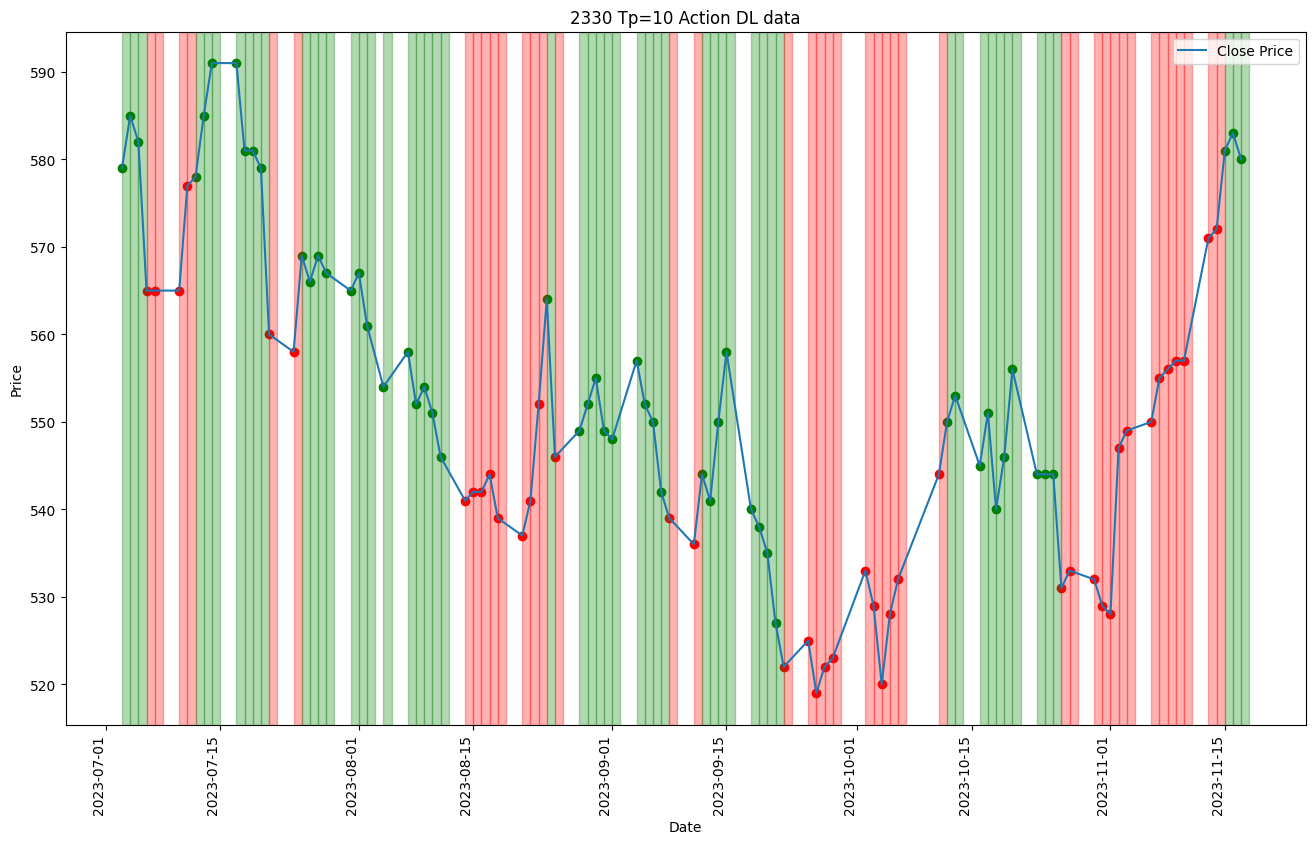

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))
Prediction['Date'] = pd.to_datetime(Prediction['Date'])
ax.plot(Prediction['Date'], Prediction['close'], label='Close Price')

for index, row in Prediction.iterrows():
    if row[f'y_{TP}'] == 1:
        plt.scatter(row['Date'], row['close'], color='red', marker='o')
    elif row[f'y_{TP}'] == 0:
        plt.scatter(row['Date'], row['close'], color='green', marker='o')

for index, row in Prediction.iterrows():
    if row[f'y_{TP}'] == 1:
        ax.axvspan(row['Date'], row['Date'] + pd.Timedelta(days=1), color='red', alpha=0.3)
    elif row[f'y_{TP}'] == 0:
        ax.axvspan(row['Date'], row['Date'] + pd.Timedelta(days=1), color='green', alpha=0.3)

plt.xlabel('Date')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Price')
plt.title(f'2330 Tp={TP} Action DL data')
plt.legend()
plt.show()

# EDM Data preprocessing

In [ ]:
###########################################################################################
TICKER = 2330
TP = 10
TARGET = f'y_{TP}'

data = pd.read_csv('/Users/yitsung/Desktop/MasterThesis/data/TaiwanStockData_Top100_EMA')
# data = pd.read_csv('/raid/ytchang/MasterThesis/data/TaiwanStockData_Top100_EMA')
###########################################################################################